# Exploring Discrete Compactness

In this notebook, we explore some discrete methods of computing district compactness, and compare their outputs.

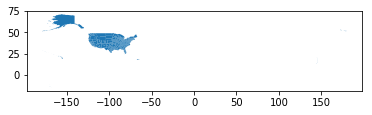

In [3]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

df_big = gpd.read_file("./cd2013/tl_rd13_us_cd113.shp")
df_small = gpd.read_file("./counties2013/cb_2013_us_county_500k.shp")
df_big.plot()
plt.show()

The first discrete compactness score will replace perimeter with the number of small units touching the shape boundary, and replace area with the number of small units touching the shape itself.

In [10]:
## TODO: map projections don't seem to work, or at least... some of them do.

#df_big = df_big.iloc[:5]
#df_big = df_big.to_crs({'init': 'epsg:102005'})
#df_big = df_big.to_crs({"init": "epsg:32614"})
#df_big.plot()
#plt.show()

In [26]:
df_big = df_big.iloc[:5]
df_big = df_big.to_crs({'init': 'epsg:102005'})

discrete_data = pd.DataFrame(columns=["GEOID","dperim","darea","perim","area"])

discrete_data = {}
for i, big_unit in df_big.iterrows():
    discrete_perimeter = 0
    discrete_area = 0
    for i, small_unit in df_small.iterrows():
        if small_unit.geometry.intersects(big_unit.geometry):
            discrete_area += 1
        if small_unit.geometry.intersects(big_unit.geometry.boundary):
            discrete_perimeter +=1
    perimeter = big_unit.geometrt.boundary.length()
    discrete_data.concat(discrete_data,pd.DataFrame())
    # discrete_data.update({big_unit["GEOID"]:[discrete_area,discrete_perimeter]})
    >>>df2 = pd.DataFrame([[2,3,4]],columns=['A','B','C'])
>>>pd.concat([df2,df])
    

We can now play around with these discrete measures. Let's use the simple ratio of discrete perimeter to discrete area.